In [1]:
import michmenkin as mm

In [2]:
mm.model.observables

ComponentSet([
 Observable('obsR', R(phos='u')),
 Observable('obsRp', R(phos='p')),
 Observable('obsS', S()),
 ])

In [3]:
from pysb.simulator import ScipyOdeSimulator
import pylab as pl

In [4]:
t = pl.linspace(0, 100, 1000)

In [5]:
simres = ScipyOdeSimulator(mm.model, tspan=t, compiler='python').run()
yout = simres.all

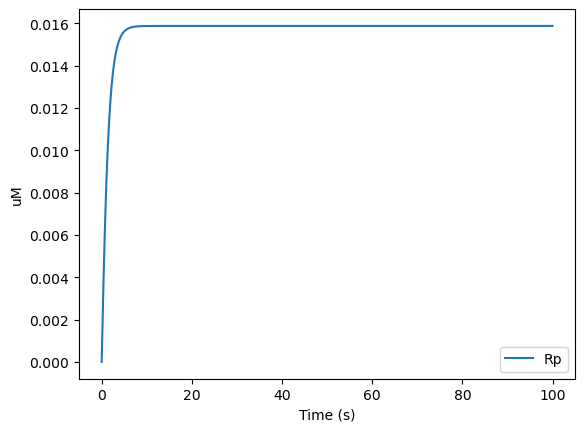

In [6]:
pl.ion()
pl.figure()
pl.plot(t, yout['obsRp'], label="Rp")
pl.legend()
pl.xlabel("Time (s)")
pl.ylabel("uM")
pl.show()

In [7]:
signal = pl.linspace(0,3,101)
response = []

In [8]:
for s in signal:
    mm.model.parameters.S_0.value = s
    simres = ScipyOdeSimulator(mm.model, tspan=t, compiler='python').run()
    yout = simres.all
    response.append(yout['obsRp'][-1])

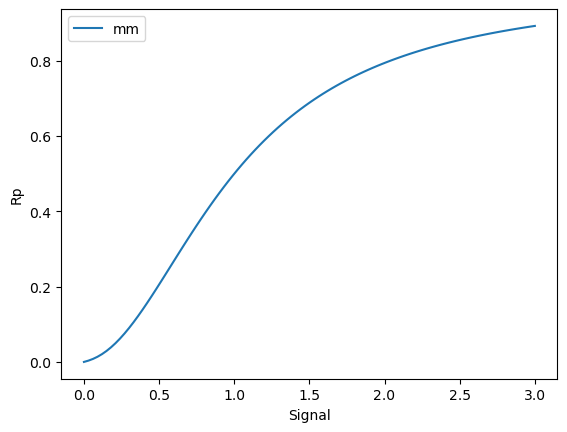

In [9]:
pl.ion()
pl.figure()
pl.plot(signal, response, label="mm")
pl.legend()
pl.xlabel("Signal")
pl.ylabel("Rp")
pl.show()